In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import skimage
from bs4 import BeautifulSoup
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
import missingno as msno
sns.color_palette()
sns.set()
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [ ]:
df.shape

(3150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
df['verified_reviews'].head(10)

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
5    I received the echo as a gift. I needed anothe...
6    Without having a cellphone, I cannot use many ...
7    I think this is the 5th one I've purchased. I'...
8                                          looks great
9    Love it! I’ve listened to songs I haven’t hear...
Name: verified_reviews, dtype: object

In [ ]:

#find unique variable 
len(df['variation'].unique())

16

In [ ]:
#plotting and count variation
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [ ]:
athletes_top_country = athletes_country.head(30)

NameError: ignored

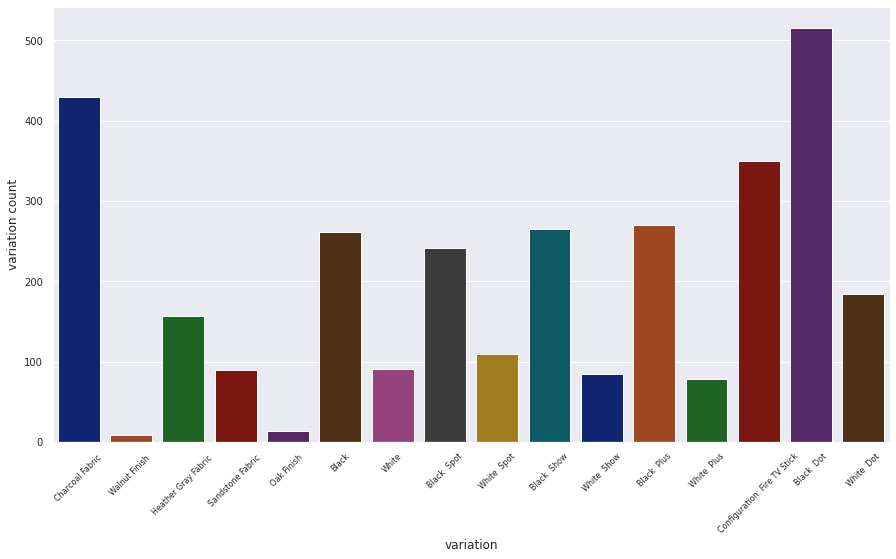

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='variation',data=df, palette="dark")
plt.xlabel('variation',fontsize=12)
plt.ylabel('variation count',fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import LinearSVC

In [ ]:
#check review again :)
df['verified_reviews'].head(10)

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
5    I received the echo as a gift. I needed anothe...
6    Without having a cellphone, I cannot use many ...
7    I think this is the 5th one I've purchased. I'...
8                                          looks great
9    Love it! I’ve listened to songs I haven’t hear...
Name: verified_reviews, dtype: object

In [ ]:
#1 transform to lowercase
df['review_lowerCase']= df['verified_reviews'].str.lower()
df[['verified_reviews','review_lowerCase']].head(10)

,verified_reviews,review_lowerCase
0,Love my Echo!,love my echo!
1,Loved it!,loved it!
2,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...
4,Music,music
5,I received the echo as a gift. I needed anothe...,i received the echo as a gift. i needed anothe...
6,"Without having a cellphone, I cannot use many ...","without having a cellphone, i cannot use many ..."
7,I think this is the 5th one I've purchased. I'...,i think this is the 5th one i've purchased. i'...
8,looks great,looks great
9,Love it! I’ve listened to songs I haven’t hear...,love it! i’ve listened to songs i haven’t hear...


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#2 remove stopwords and punc
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

df["fix_reviews"] = df.verified_reviews.apply(lambda x: word_tokenize(x))

df["fix_reviews"] = df.fix_reviews.apply(lambda x: [w for w in x if w not in stop_words])

df["fix_reviews"] = df.fix_reviews.apply(lambda x: " ".join(x))

In [ ]:
#3 remove HTML tag
df['review_lowerCase'] = df['review_lowerCase'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().strip())

df[['verified_reviews','review_lowerCase']].head(10)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://www.amazon.com/dp/b073sqyxtw/ref=cm_cr_ryp_prd_ttl_sol_18" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


,verified_reviews,review_lowerCase
0,Love my Echo!,love my echo!
1,Loved it!,loved it!
2,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...
4,Music,music
5,I received the echo as a gift. I needed anothe...,i received the echo as a gift. i needed anothe...
6,"Without having a cellphone, I cannot use many ...","without having a cellphone, i cannot use many ..."
7,I think this is the 5th one I've purchased. I'...,i think this is the 5th one i've purchased. i'...
8,looks great,looks great
9,Love it! I’ve listened to songs I haven’t hear...,love it! i’ve listened to songs i haven’t hear...


In [ ]:
df[['verified_reviews','review_lowerCase']].tail(10)

,verified_reviews,review_lowerCase
3140,Barry,barry
3141,,
3142,My three year old loves it. Good for doing ba...,my three year old loves it. good for doing ba...
3143,Awesome device wish I bought one ages ago.,awesome device wish i bought one ages ago.
3144,love it,love it
3145,"Perfect for kids, adults and everyone in betwe...","perfect for kids, adults and everyone in betwe..."
3146,"Listening to music, searching locations, check...","listening to music, searching locations, check..."
3147,"I do love these things, i have them running my...","i do love these things, i have them running my..."
3148,Only complaint I have is that the sound qualit...,only complaint i have is that the sound qualit...
3149,Good,good


In [ ]:
positive = df[df["feedback"]==0]
negative = df[df["feedback"]==1]

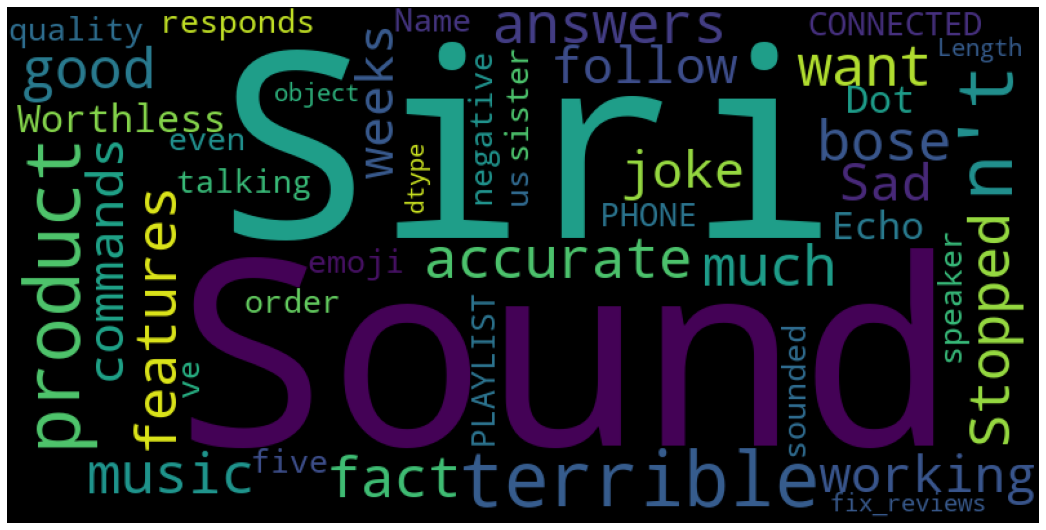

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# Generate a word cloud image
positive_wordcloud = WordCloud(width=800, height=400 ,background_color='black').generate(str(positive["fix_reviews"]))
#Positive Word cloud
plt.figure(figsize=(15,8), facecolor='white')
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.tight_layout(pad=2)
plt.show();

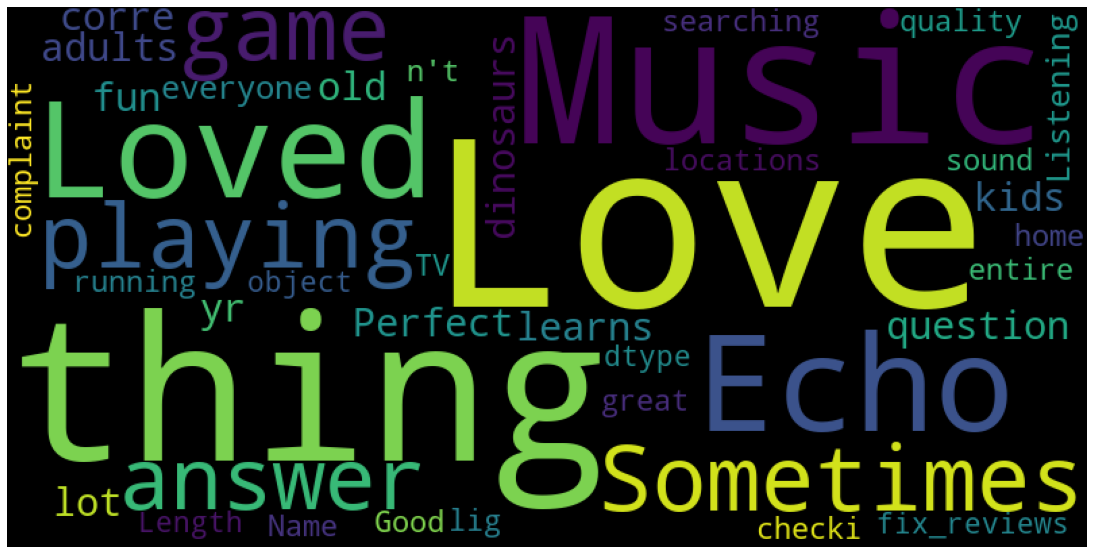

In [ ]:
# Generate a word cloud image
negative_wordcloud = WordCloud(width=800, height=400,background_color='black').generate(str(negative["fix_reviews"]))
#Negative Word cloud
plt.figure(figsize=(15,8), facecolor='white')
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


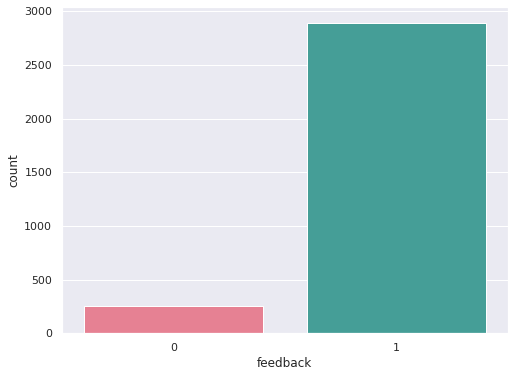

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df["feedback"], label="Count", palette="husl");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


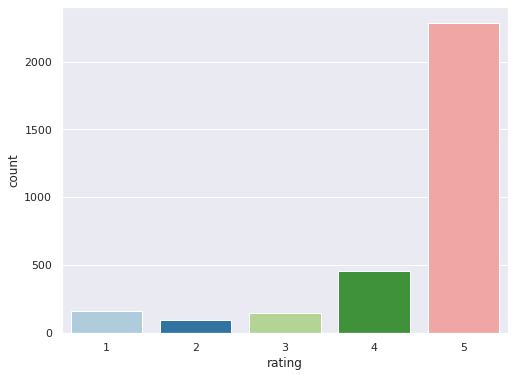

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df["rating"],palette ="Paired");

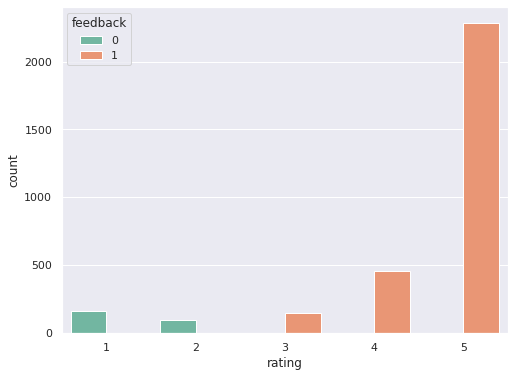

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="rating", hue="feedback", data=df,palette ="Set2")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


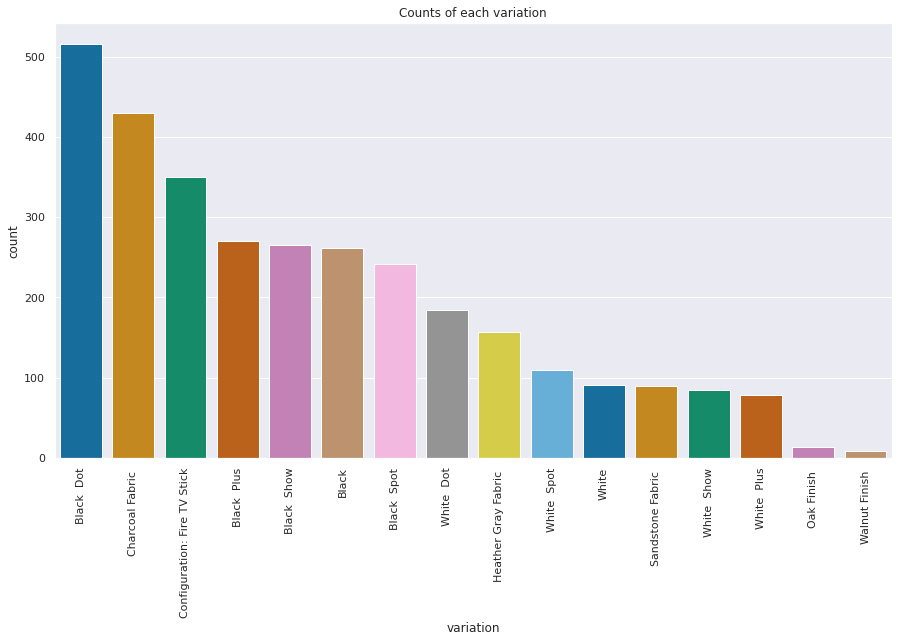

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(df.variation,
              order = df["variation"].value_counts().index,
              palette='colorblind')
plt.xticks(rotation=90)
plt.title('Counts of each variation');

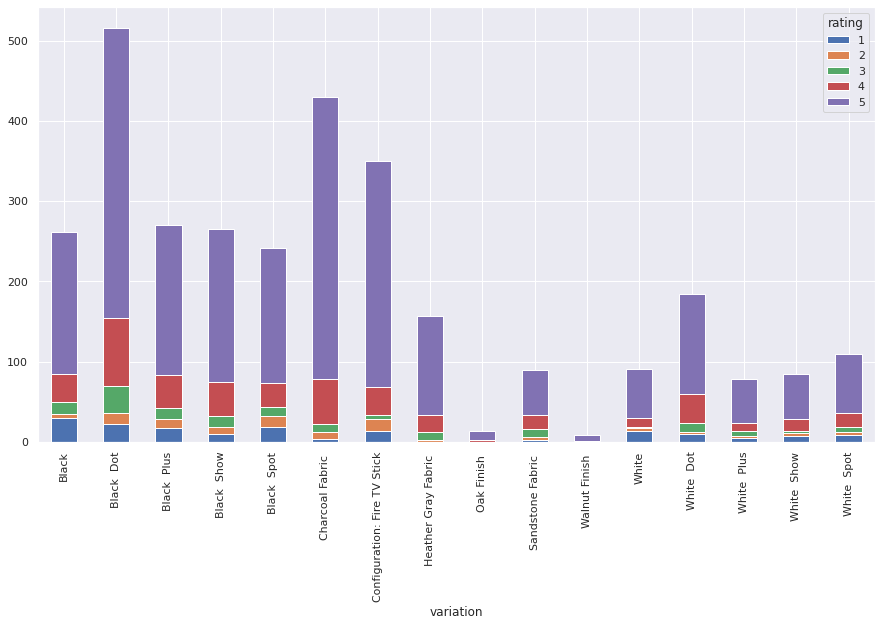

In [ ]:
df.groupby(["variation", "rating"]).rating.count().unstack().plot(kind="bar", stacked=True);

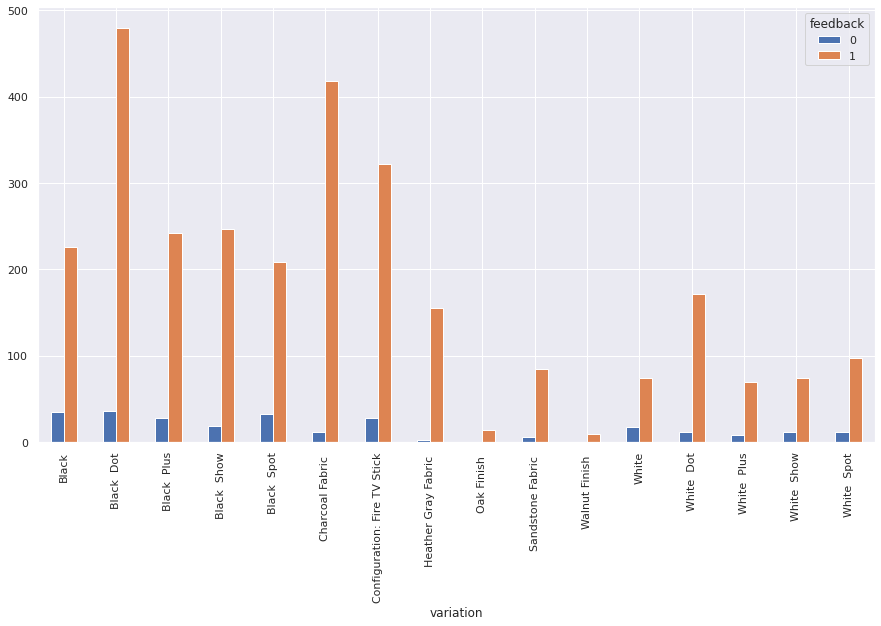

In [ ]:
df.groupby(["variation", "feedback"]).rating.count().unstack().plot(kind="bar");


## **Feature Engineering**
Extracting Year, Month, Day of the Week from date

In [ ]:
df["datetime"] = pd.to_datetime(df.date)
df.head(5)

,rating,date,variation,verified_reviews,feedback,review_lowerCase,fix_reviews,datetime
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,Love Echo !,2018-07-31
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,Loved !,2018-07-31
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...","Sometimes playing game , answer question corre...",2018-07-31
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,I lot fun thing . My 4 yr old learns dinosaurs...,2018-07-31
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,Music,2018-07-31


In [ ]:
df["month"] = df.datetime.dt.month

In [ ]:
df["year"] = df.datetime.dt.year

In [ ]:
df["day_of_week"] = df.datetime.dt.dayofweek

In [ ]:
df.head(10)

,rating,date,variation,verified_reviews,feedback,review_lowerCase,fix_reviews,datetime,month,year,day_of_week
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,Love Echo !,2018-07-31,7,2018,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,Loved !,2018-07-31,7,2018,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...","Sometimes playing game , answer question corre...",2018-07-31,7,2018,1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,I lot fun thing . My 4 yr old learns dinosaurs...,2018-07-31,7,2018,1
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,Music,2018-07-31,7,2018,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,i received the echo as a gift. i needed anothe...,I received echo gift . I needed another Blueto...,2018-07-31,7,2018,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,"without having a cellphone, i cannot use many ...","Without cellphone , I use many features . I iP...",2018-07-31,7,2018,1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,i think this is the 5th one i've purchased. i'...,I think 5th one I 've purchased . I 'm working...,2018-07-31,7,2018,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,looks great,looks great,2018-07-30,7,2018,0
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,love it! i’ve listened to songs i haven’t hear...,Love ! I ’ listened songs I ’ heard since chil...,2018-07-30,7,2018,0


# Estimating length of the reviews
Calculating the length of text proves to be an important feature for classifying text in a Natural Language Processing problem.

In [ ]:
df["lenOf_reviews"] = df["verified_reviews"].apply(len)

In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback,review_lowerCase,fix_reviews,datetime,month,year,day_of_week,lenOf_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,Love Echo !,2018-07-31,7,2018,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,Loved !,2018-07-31,7,2018,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...","Sometimes playing game , answer question corre...",2018-07-31,7,2018,1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,I lot fun thing . My 4 yr old learns dinosaurs...,2018-07-31,7,2018,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,Music,2018-07-31,7,2018,1,5


## Data **Preprocessing**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
kelas = TfidfVectorizer(stop_words = "english")
kelas_data = pd.DataFrame(kelas.fit_transform(df["fix_reviews"]).toarray())

## One Hot **Encoding**

In [ ]:
dummy = pd.get_dummies(df["variation"])
X= pd.concat([df["rating"], dummy , kelas_data, df["month"], df["day_of_week"], df['lenOf_reviews']], axis=0)


In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3753,3754,3755,3756,3757,3758,3759,3760,3761,3762,3763,3764,3765,3766,3767,3768,3769,3770,3771,3772,3773,3774,3775,3776,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y = df["feedback"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: feedback, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape

((2205, 3797), (945, 3797))

In [ ]:
y_train.shape, y_test.shape

((2205,), (945,))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion="entropy")
rf_model = rf.fit(X_train, y_train)

In [ ]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
feature_importances = pd.DataFrame(rf_model.feature_importances_, index = X_train.columns, 
                                   columns=["importance"]).sort_values("importance", ascending=False)

In [ ]:
feature_importances.head(10)

,importance
rating,0.408891
lenOf_reviews,0.023582
2025,0.022853
1494,0.013259
3217,0.009079
day_of_week,0.007540
3484,0.006541
3726,0.006189
1092,0.006060
3360,0.005682


In [ ]:
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

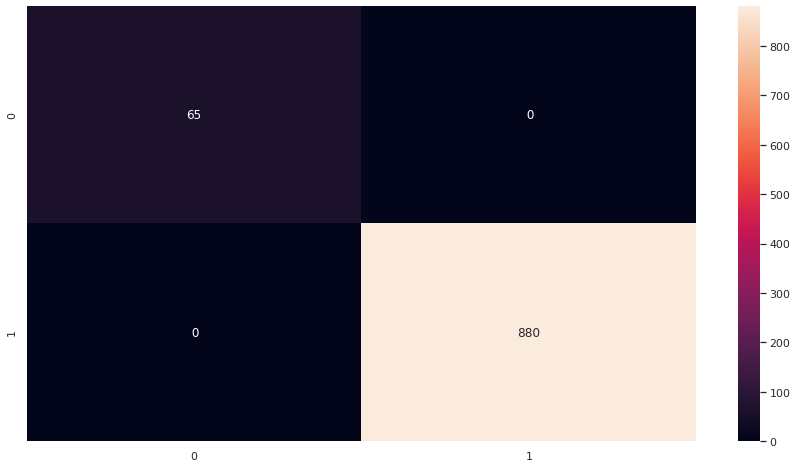

In [ ]:
sns.heatmap(cm, annot=True, fmt="2.0f");

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       880

    accuracy                           1.00       945
   macro avg       1.00      1.00      1.00       945
weighted avg       1.00      1.00      1.00       945



In [ ]:
results = pd.DataFrame(data = {"feedback": y_test, "predicted_results": y_pred})

In [ ]:
results.head(10)

,feedback,predicted_results
2158,1,1
973,1,1
1778,1,1
892,1,1
2375,1,1
2514,1,1
2498,1,1
2815,1,1
412,1,1
1890,1,1
